# Preprocessing

To choose the perfect beer we want to analyze the impact of alcohol concentration on popularity of a beer. We want to analyze the following research question: Does the alcohol content lead to a perceiveable change in ratings or review sentiment?

In [5]:
# imports
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import numpy as np
import plotly.express as px
import plotly.graph_objects as go

General Preprocessing for dataset

In [6]:
# loading the ratings dataset 

ratings_ba_df = pd.read_csv('data/BeerAdvocate/ratings_BA.csv')
ratings_rb_df = pd.read_csv('data/RateBeer/ratings_RB.csv')

# loading the beers dataset

beers_ba_df = pd.read_csv('data/BeerAdvocate/beers.csv')
beers_rb_df = pd.read_csv('data/RateBeer/beers.csv')

In [7]:
# Convert the date column to datetime format for BeerAdvocate
ratings_ba_df['date'] = pd.to_datetime(ratings_ba_df['date'], unit='s')
ratings_ba_df['year'] = ratings_ba_df['date'].dt.year
ratings_ba_df['month'] = ratings_ba_df['date'].dt.month

# Convert the date column to datetime format for RateBeer
ratings_rb_df['date'] = pd.to_datetime(ratings_rb_df['date'], unit='s')
ratings_rb_df['year'] = ratings_rb_df['date'].dt.year
ratings_rb_df['month'] = ratings_rb_df['date'].dt.month

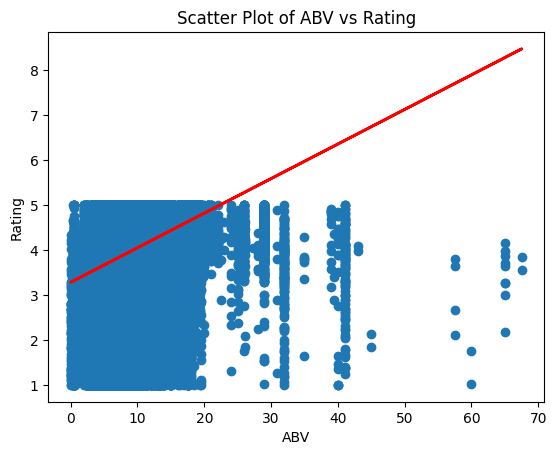

Correlation Coefficient: 0.3005760482059104


In [8]:
# Create a new DataFrame by merging only the required columns based on 'beer_id'
merged_df = ratings_ba_df[['rating', 'beer_id']].merge(beers_ba_df[['beer_id', 'abv']], on='beer_id', how='left')

# Drop rows with NaN values in 'abv'
merged_df = merged_df.dropna(subset=['abv'])

# Create a scatter plot
plt.scatter(merged_df['abv'], merged_df['rating'])
plt.title('Scatter Plot of ABV vs Rating')
plt.xlabel('ABV')
plt.ylabel('Rating')

# Perform linear regression
X = merged_df[['abv']]
y = merged_df['rating']

# Fit the model
model = LinearRegression()
model.fit(X, y)

# Get the slope and intercept
slope = model.coef_[0]
intercept = model.intercept_

# Plot the regression line
plt.plot(X, slope * X + intercept, color='red', linewidth=2)

# Display the plot
plt.show()

# Output the correlation coefficient
correlation_coefficient = np.corrcoef(merged_df['abv'], merged_df['rating'])[0, 1]
print(f"Correlation Coefficient: {correlation_coefficient}")


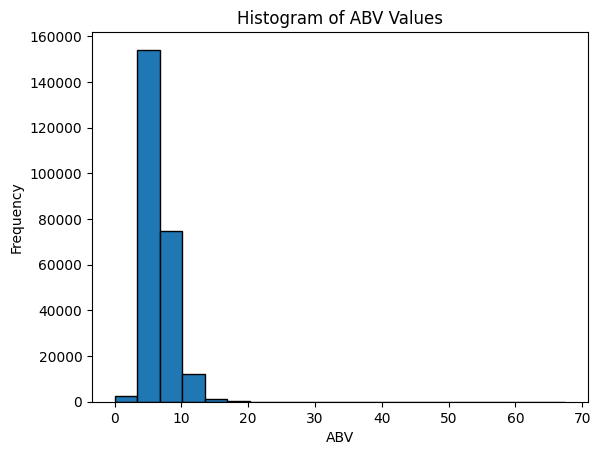

In [9]:

# Drop NaN values in 'abv' column
abv_values = beers_ba_df['abv'].dropna()

# Create a histogram
plt.hist(abv_values, bins=20, edgecolor='black')  # You can adjust the number of bins as needed
plt.title('Histogram of ABV Values')
plt.xlabel('ABV')
plt.ylabel('Frequency')

# Display the plot
plt.show()

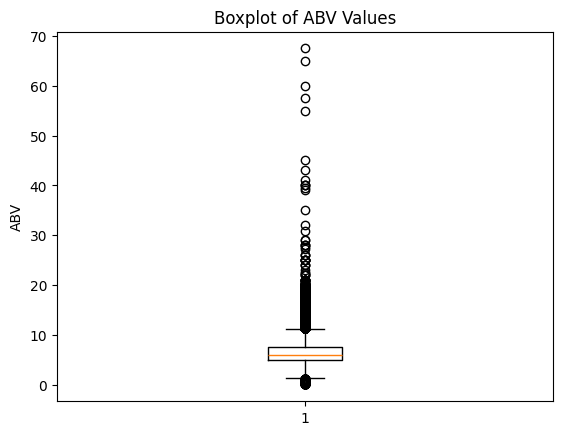

0         4.7
1         3.8
2         4.8
3         4.0
4         4.5
         ... 
280816    5.6
280817    6.8
280818    5.0
280819    5.3
280821    7.0
Name: abv, Length: 244799, dtype: float64

In [10]:
# Drop NaN values in 'abv' column
abv_values = beers_ba_df['abv'].dropna()

# Create a boxplot
plt.boxplot(abv_values)
plt.title('Boxplot of ABV Values')
plt.ylabel('ABV')

# Display the plot
plt.show()
display(beers_ba_df['abv'].dropna())

In [11]:
# Display number of beers with high abv scores
# Define the ABV thresholds
abv_thresholds = [15, 20, 30, 40, 50, 60, 70]

# Count the number of beers above each threshold
for threshold in abv_thresholds:
    count_above_threshold = (beers_ba_df['abv'] > threshold).sum()
    print(f"Number of beers above {threshold} ABV: {count_above_threshold}")


Number of beers above 15 ABV: 551
Number of beers above 20 ABV: 55
Number of beers above 30 ABV: 16
Number of beers above 40 ABV: 8
Number of beers above 50 ABV: 5
Number of beers above 60 ABV: 2
Number of beers above 70 ABV: 0


In [12]:
# analyzing why some abv scores are that high
# Filter the DataFrame to get examples with ABV over 40
high_abv_examples = beers_ba_df[beers_ba_df['abv'] > 40]

# Display the examples
print("Examples with ABV over 40:")
print(high_abv_examples.head())

Examples with ABV over 40:
       beer_id                      beer_name  brewery_id  brewery_name  \
2010     57015             Sink The Bismarck!       16315       BrewDog   
2021    133448             The End Of History       16315       BrewDog   
2050     89801                     Armageddon       30178   Brewmeister   
2059    104620                    Snake Venom       30178   Brewmeister   
41539    57856  Schorschbräu Schorschbock 43%        6513  Schorschbräu   

                                style  nbr_ratings  nbr_reviews   avg  \
2010   American Double / Imperial IPA          220          100  3.56   
2021                          Eisbock            2            0  3.88   
2050                          Eisbock           18            8  3.36   
2059               English Barleywine            6            2  3.68   
41539                         Eisbock            2            2  4.03   

       ba_score  bros_score   abv  avg_computed    zscore  \
2010       81.0       

[Snake Venom](https://www.fooddive.com/news/strongest-beer-in-the-world-snake-venom-sports-675-abv/185830/)
 is officially the world's strongest beer at an abv of 67.5 

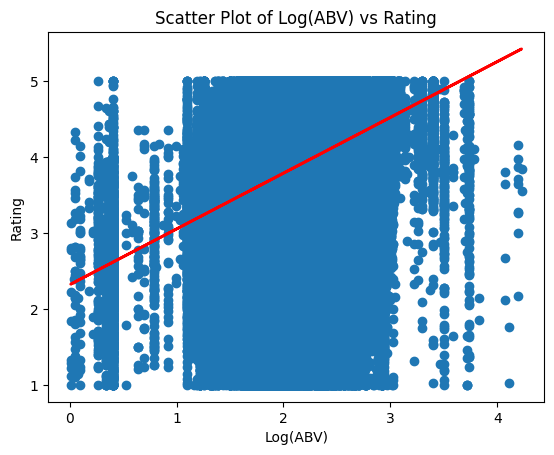

Correlation Coefficient: 0.32682683280116637


In [13]:
# decrease the effect of the outliers

# Merge the two DataFrames
merged_df = ratings_ba_df[['rating', 'beer_id']].merge(beers_ba_df[['beer_id', 'abv']], on='beer_id', how='left')

# Drop rows with NaN values in 'abv'
merged_df = merged_df.dropna(subset=['abv'])

# Apply a logarithmic transformation to 'abv'
merged_df['log_abv'] = np.log1p(merged_df['abv'])

# Create a scatter plot with the transformed 'abv'
plt.scatter(merged_df['log_abv'], merged_df['rating'])
plt.title('Scatter Plot of Log(ABV) vs Rating')
plt.xlabel('Log(ABV)')
plt.ylabel('Rating')

# Perform linear regression on the transformed data
X = merged_df[['log_abv']]
y = merged_df['rating']

# Fit the model
model = LinearRegression()
model.fit(X, y)

# Get the slope and intercept
slope = model.coef_[0]
intercept = model.intercept_

# Plot the regression line on the transformed data
plt.plot(X, slope * X + intercept, color='red', linewidth=2)

# Display the plot
plt.show()

# Output the correlation coefficient
correlation_coefficient = np.corrcoef(merged_df['log_abv'], merged_df['rating'])[0, 1]
print(f"Correlation Coefficient: {correlation_coefficient}")

In [14]:
import statsmodels.api as sm
from sklearn.linear_model import HuberRegressor

# Assuming you have a DataFrame named merged_df with columns 'rating' and 'abv'

# Filter the data to keep ratings between 0 and 5 and ABV between 0 and 70
filtered_df = merged_df[(merged_df['rating'] >= 0) & (merged_df['rating'] <= 5) & (merged_df['abv'] >= 0) & (merged_df['abv'] <= 70)]

# Perform robust regression using Huber Regressor
X = sm.add_constant(filtered_df['abv'])  # Add a constant term for the intercept
y = filtered_df['rating']

# Fit the model
model = HuberRegressor()
model.fit(X, y)

# Print the summary statistics
print(sm.OLS(y, X).fit().summary())


                            OLS Regression Results                            
Dep. Variable:                 rating   R-squared:                       0.090
Model:                            OLS   Adj. R-squared:                  0.090
Method:                 Least Squares   F-statistic:                 2.629e+05
Date:                Wed, 13 Dec 2023   Prob (F-statistic):               0.00
Time:                        17:08:01   Log-Likelihood:            -2.3306e+06
No. Observations:             2647205   AIC:                         4.661e+06
Df Residuals:                 2647203   BIC:                         4.661e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.2821      0.001   2885.393      0.0

The regression results indicate the following:

- **Correlation Coefficient:** 0.3268
- **R-squared:** 0.090 (proportion of the variance in the dependent variable explained by the independent variable)
- **P-values for Coefficients:**
  - **const (Intercept):** \(3.2821\) (p-value < 0.001)
  - **abv (Slope):** \(0.0769\) (p-value < 0.001)

**Interpretation:**

1. **Correlation Coefficient:** The correlation coefficient of 0.3268 indicates a positive correlation between ABV and rating. However, it's a relatively weak correlation.

2. **R-squared:** The R-squared value of 0.090 suggests that only a small proportion (9%) of the variance in the rating can be explained by the ABV.

3. **P-values for Coefficients:**
   - The p-value for the constant (intercept) is extremely small (p < 0.001), suggesting that the intercept is significantly different from zero.
   - The p-value for ABV is also extremely small (p < 0.001), indicating that the ABV coefficient is significantly different from zero. This suggests that ABV has a statistically significant influence on the rating.

Overall, while there is a statistically significant influence of ABV on the rating, the R-squared value suggests that ABV alone explains only a small portion of the variability in the rating.

#### ToDo

Match les deux dataset pour les bières<br>

analyse par mois<br>
quel pourcentage est le plus préféré

2 analyses:<br>
--> quelle est le pourcentage préf (par mois)<br>
--> quelle est la bière préf (par mois) --> extraire pourcentage et comparer<br>
----> définir un type de bière avec un certain pourcentage optimal par mois

à chaque fois prouver et justifier (montrer quoi trouvé et pourqoui)

esq style a son pourventage ou juste chaque bière


le dataset final (justifié) va être matché pour les styles, mais il y a tjrs les binchs individuelles

13.12.23

In [15]:
## load users dataset for US filter

users_ba_df = pd.read_csv('data/BeerAdvocate/users.csv')
users_rb_df = pd.read_csv('data/RateBeer/users.csv')

In [16]:
## ------------------ location modif --------------------- ##

users_rb_df['location'] = users_rb_df['location'].str.split(',').str[0]
users_ba_df['location'] = users_ba_df['location'].str.split(',').str[0]

## ------------------  filtrage US users ----------------- ##

US_country = 'United States'

# keep only the rows where the user country is United States
users_ba_df = users_ba_df[users_ba_df.location == US_country]
users_rb_df = users_rb_df[users_rb_df.location == US_country]

## ------------------  filtrage US reviews --------------- ##

# merge the ratings and users data frames to get the location of the user for each rating
ratings_users_ba_df = pd.merge(ratings_ba_df, users_ba_df[['user_id', 'location']], on='user_id', how='inner')
ratings_users_rb_df = pd.merge(ratings_rb_df, users_rb_df[['user_id', 'location']], on='user_id', how='inner')

# filter the ratings dataframes to only keep the ratings of the users from the US
ratings_ba_df = ratings_users_ba_df[ratings_users_ba_df.location == US_country]
ratings_ba_df.drop('location', axis=1, inplace=True)
ratings_rb_df = ratings_users_rb_df[ratings_users_rb_df.location == US_country]
ratings_rb_df.drop('location', axis=1, inplace=True)

# merge the two ratings data frames
ratings_combined_df = pd.concat([ratings_ba_df, ratings_rb_df], ignore_index=True)

In [17]:
# Create a dictionary mapping beer_id to abv
abv_mapping = beers_ba_df.set_index('beer_id')['abv'].to_dict()

# Map the abv values to the ratings_combined_df using the beer_id
ratings_combined_df['abv'] = ratings_combined_df['beer_id'].map(abv_mapping)

In [18]:
# temporal analysis of alc percentage for months yearly plot

# create a year_month column
ratings_combined_df['year_month'] = ratings_combined_df['year'].astype(str) + '-' + ratings_combined_df['month'].astype(str)

# convert the year_month column to datetime format
ratings_combined_df['year_month'] = pd.to_datetime(ratings_combined_df['year_month'])

# Group by year_month and calculate the average ABV for each month
average_month_abv = ratings_combined_df.groupby('year_month')['abv'].mean()

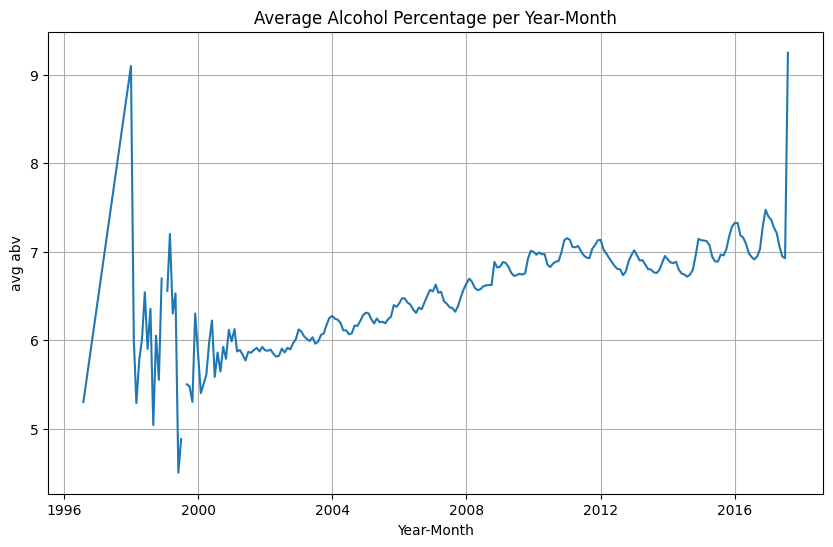

In [19]:
# Yearly plot of the number of ratings
plt.figure(figsize=(10, 6))
plt.plot(average_month_abv)
plt.title('Average Alcohol Percentage per Year-Month')
plt.xlabel('Year-Month')
plt.grid()
plt.ylabel('avg abv')
plt.show()

We can observe a fluctuation depending on the month and a general temporal tendency

# do the same for just every month

In [20]:
# creating a new dataframe with the number of ratings per year_month
year_month_abv_df = pd.DataFrame({'year_month': average_month_abv.index, 'mean_abv': average_month_abv.values})

# create column year and month
year_month_abv_df['year'] = year_month_abv_df['year_month'].dt.year
year_month_abv_df['month'] = year_month_abv_df['year_month'].dt.month

# keep only rows where the year is greater than 2011 and less than 2017 
year_month_abv_filtered = year_month_abv_df[(year_month_abv_df.year >= 2008) & (year_month_abv_df.year < 2017)]

# compute the mean number of ratings per month
mean_abv_per_month = year_month_abv_filtered.groupby('month')['mean_abv'].mean().reset_index(name='mean_abv')

# plot with plotly the mean number of ratings per month
fig = px.line(year_month_abv_filtered, x='month', y='mean_abv', color='year', title='Mean Percentage of Alcohol per Month (from 2008 to 2016)')
fig.add_trace(go.Scatter(x=year_month_abv_filtered.month, y=mean_abv_per_month.mean_abv, mode='lines', name='Mean abv', line=dict(color='black', dash='dash', width=4)))

fig.show()

In [21]:
# observe slight tendency of higher mean abv towards winter

In [40]:


def plot_abv_vs_rating_monthly(merged_df):

    # Grouping by month and ABV, then calculating mean rating
    monthly_abv_rating = merged_df.groupby(['month', 'abv'])['rating'].mean().reset_index()

    # Create a 3x4 grid of subplots (3 rows, 4 columns)
    fig, axes = plt.subplots(3, 4, figsize=(16, 12))
    for month in range(1, 13):
        row = (month - 1) // 4
        col = (month - 1) % 4

        ax = axes[row, col]
        monthly_data = monthly_abv_rating[monthly_abv_rating['month'] == month]

        ax.bar(monthly_data['abv'], monthly_data['rating'])

        ax.set_title(f'Month: {month}')

        ax.set_xlabel('ABV')
        ax.set_ylabel('Average Rating')

    # Adjust layout spacing and display the plots
    plt.tight_layout()
    plt.show()

def favorite_abv_per_month(merged_df):
    # Grouping by month and ABV, then calculating mean rating
    monthly_abv_rating = merged_df.groupby(['month', 'abv'])['rating'].mean().reset_index()

    # Finding the ABV with the highest rating for each month
    favorite_abv = monthly_abv_rating.loc[monthly_abv_rating.groupby('month')['rating'].idxmax()]

    return favorite_abv[['month', 'abv', 'rating']]

def wilson_lower_bound_abv(merged_df):
    # Grouping by ABV and calculating the Wilson lower bound score for each
    abv_grouped = merged_df.groupby('abv').agg({'rating': ['count', 'mean']}).reset_index()
    abv_grouped.columns = ['abv', 'count', 'mean']

    # Calculate Wilson lower bound
    n = abv_grouped['count']
    p_hat = abv_grouped['mean'] / 5  # Assuming ratings are out of 5
    z = 1.96  # 95% confidence
    abv_grouped['wilson_lower_bound'] = (p_hat + z**2/(2*n) - z * np.sqrt((p_hat*(1-p_hat) + z**2/(4*n))/n)) / (1 + z**2/n)

    # Sorting by Wilson lower bound score
    abv_grouped = abv_grouped.sort_values('wilson_lower_bound', ascending=False)

    return abv_grouped

### ---> nope, calculate wilson lower bound to choose best beer per month!!

# Example usage
# plot_abv_vs_rating_monthly(merged_df)
# favorite_abv = favorite_abv_per_month(merged_df)
# wilson_scores = wilson_lower_bound_abv(merged_df)


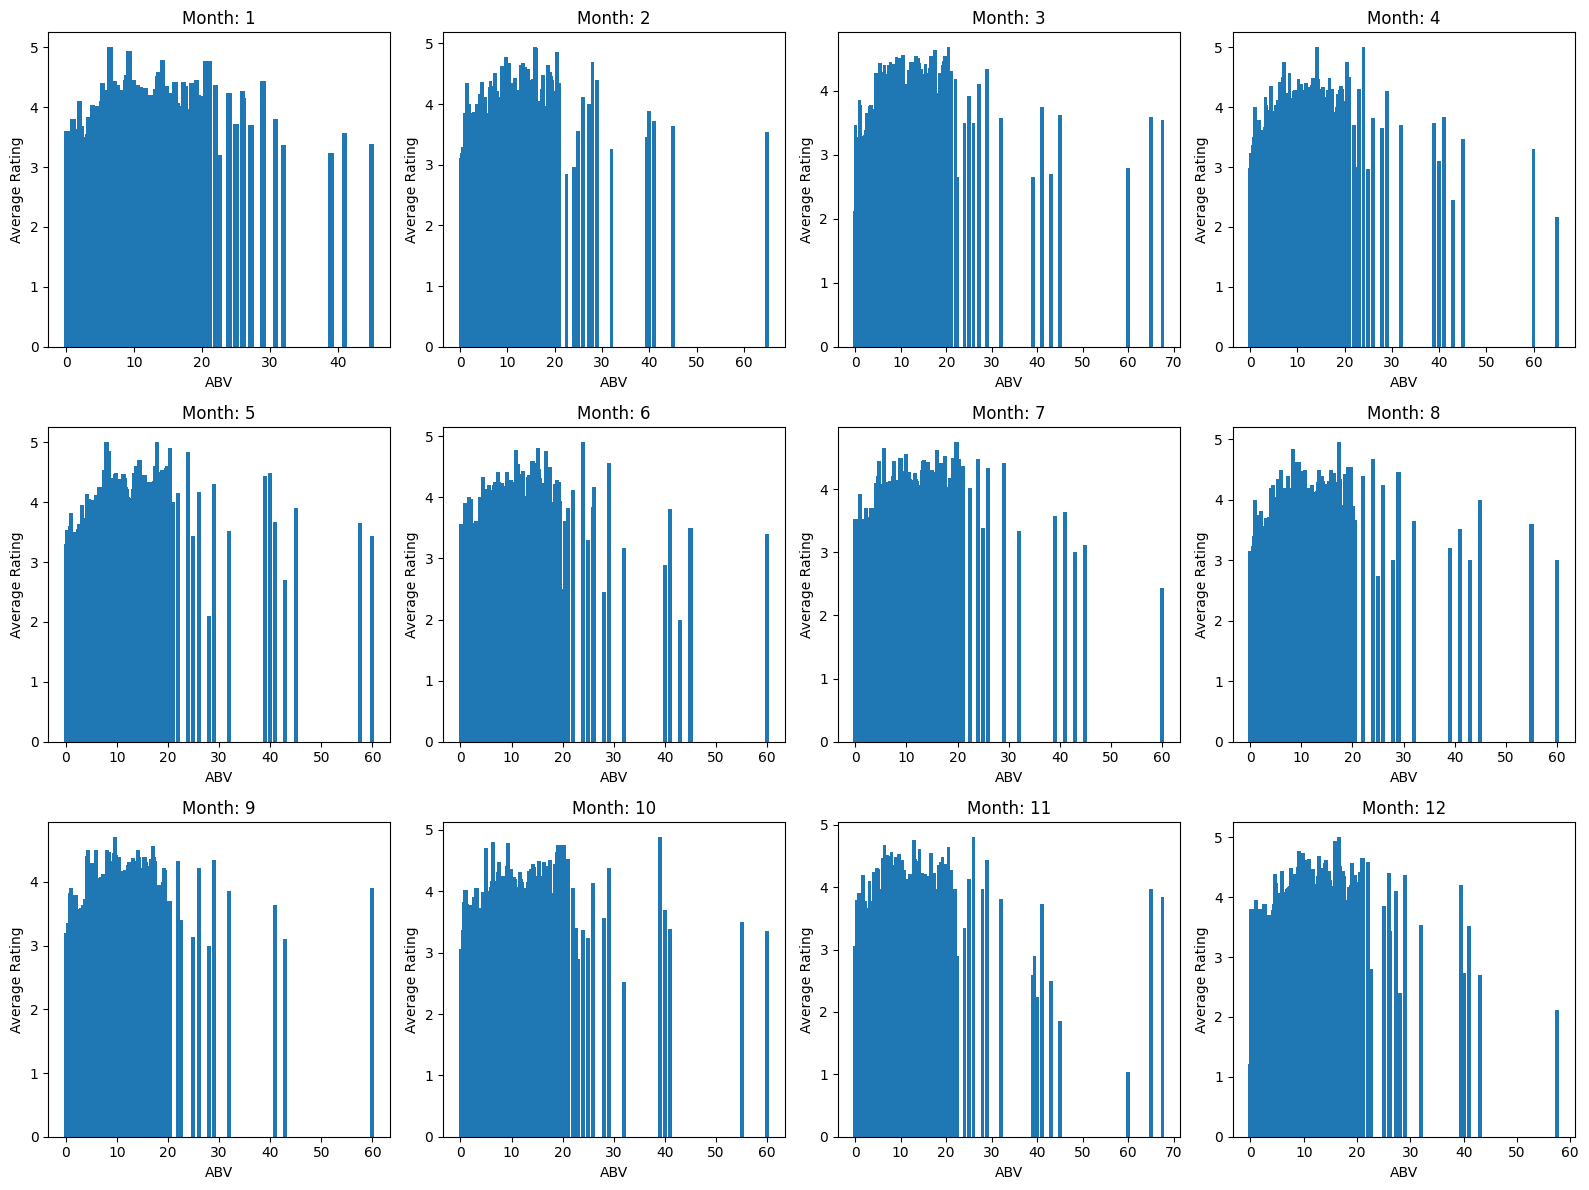

,month,abv,rating
235,1,6.42,5.000000
1123,2,15.90,4.935000
1762,3,20.50,4.678333
2302,4,14.17,5.000000
2691,5,7.98,5.000000
3561,6,24.00,4.900000
4157,7,19.80,4.740000
4729,8,17.35,4.950000
5174,9,9.72,4.700000
5923,10,39.00,4.880000


,abv,count,mean,wilson_lower_bound
698,13.40,1986,4.462497,0.878111
707,13.80,3775,4.362448,0.861469
773,19.20,851,4.412456,0.859116
703,13.60,1227,4.356218,0.851338
797,29.00,536,4.396660,0.849022
...,...,...,...,...
719,14.65,1,3.000000,0.077117
686,12.88,1,2.900000,0.072322
72,3.94,1,1.700000,0.026307
5,0.25,1,1.670000,0.025432


In [42]:
plot_abv_vs_rating_monthly(ratings_combined_df)
favorite_abv = favorite_abv_per_month(ratings_combined_df)
display(favorite_abv)
wilson_scores = wilson_lower_bound_abv(ratings_combined_df)
display(wilson_scores)

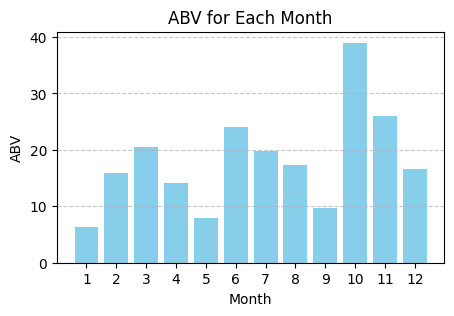

In [45]:
# Extract the data from your DataFrame
months = favorite_abv['month']
abv_values = favorite_abv['abv']

# Create a bar plot
plt.figure(figsize=(5, 3))
plt.bar(months, abv_values, color='skyblue')
plt.title('ABV for Each Month -- problem: not taken into account the number of reviews')
plt.xlabel('Month')
plt.ylabel('ABV')
plt.xticks(range(1, 13))  # Ensure that all months are shown on the x-axis
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add a grid for better visualization

plt.show()


In [48]:
# Extract the data from your DataFrame
abv_values = wilson_scores['abv']

# Create a bar plot
plt.figure(figsize=(12, 6))
plt.bar(range(len(abv_values)), abv_values, color='lightblue')
plt.title('ABV for Each Entry in Wilson Scores DataFrame')
plt.xlabel('Entry')
plt.ylabel('ABV')
plt.xticks(range(len(abv_values)), rotation=90)  # Label each entry with ABV on the x-axis
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add a grid for better visualization

plt.show()


KeyError: 'abv'

In [ ]:
# plot the abv vs # of reviews to check for most popular abv for every month

########################### code below to plot favourite beer style ####################3
# Number of top beer styles to plot
x = 20

fig, axes = plt.subplots(4, 3, figsize=(18, 17))
fig.suptitle(f'Top {x} Beer Styles by Count for Each Month  + Ranking of Average Ratings')

max_count_across_months = ratings_combined_df.groupby('month')['style'].value_counts().head(x).max()
style_occurrences = {style: 0 for style in unique_styles}

for month, ax in zip(range(1, 13), axes.flatten()):
    month_data = ratings_combined_df[ratings_combined_df['month'] == month]
    month_data_untouched = ratings_combined_df_untouched[ratings_combined_df_untouched['month'] == month]
    top_styles_by_count = month_data['style'].value_counts().head(x).index
    avg_ratings_by_style = month_data_untouched.groupby('style')['rating'].mean().sort_values(ascending=False)

    # Count the number of times each style appears in the top 20 for each month
    for style in top_styles_by_count:
        style_occurrences[style] += 1

    sns.countplot(y='style', data=month_data, order=top_styles_by_count, ax=ax, color='mediumslateblue')
    ax.set_title(f'Month {month}', fontsize=10)
    ax.set_xlabel('Count')
    ax.set_ylabel('')
    ax.set_xlim(0, max_count_across_months + 5000)
    for i, style in enumerate(top_styles_by_count):
        ranking = avg_ratings_by_style.index.get_loc(style) + 1
        ax.text(month_data['style'].value_counts()[i], i, f'Rank {ranking}', va='center', ha='left', color='black', fontsize=8)

plt.tight_layout()
plt.show()

# Print the style occurrences dictionary and remove styles that never appear in the top 20
style_occurrences = {style: count for style, count in style_occurrences.items() if count > 0}
print("Number of styles that appear in the top 20 for at least one month: \n", len(style_occurrences))
print("Style Occurrences:")
for style, count in style_occurrences.items():
    print(f"{style}: {count} times")


In [ ]:
## --------- future analysis ---------- ##

# choisir la bière préféré par mois --> éxtraire son pourcentage


# choisir le style préféré par mois --> éxtraire son pourcentage


# est-ce que il y a un pourcentage characteristique par bière



In [28]:

from typing import Tuple, List, Dict
from scipy.stats import binom

def calculate_monthly_mean_ratings(df: pd.DataFrame) -> Dict[int, pd.DataFrame]:
    """
    Calculate the mean rating for each ABV in each month.
    
    :param df: DataFrame with columns 'rating', 'abv', 'year', and 'month'.
    :return: A dictionary with month as key and DataFrame of mean ratings per ABV as value.
    """
    monthly_mean_ratings = {}
    for month in range(1, 13):
        monthly_data = df[df['month'] == month]
        mean_ratings = monthly_data.groupby('abv')['rating'].mean().reset_index()
        monthly_mean_ratings[month] = mean_ratings
    return monthly_mean_ratings

def plot_monthly_abv_ratings(monthly_mean_ratings: Dict[int, pd.DataFrame]):
    """
    Plot the mean rating vs ABV for each month.
    
    :param monthly_mean_ratings: Dictionary with month as key and DataFrame of mean ratings per ABV as value.
    """
    plt.figure(figsize=(15, 10))
    for month, data in monthly_mean_ratings.items():
        plt.plot(data['abv'], data['rating'], label=f'Month {month}')
    plt.xlabel('ABV')
    plt.ylabel('Mean Rating')
    plt.title('Monthly Mean Rating vs ABV')
    plt.legend()
    plt.show()

def find_favorite_abv_per_month(monthly_mean_ratings: Dict[int, pd.DataFrame]) -> Dict[int, float]:
    """
    Determine the favorite ABV for each month based on the highest mean rating.
    
    :param monthly_mean_ratings: Dictionary with month as key and DataFrame of mean ratings per ABV as value.
    :return: Dictionary with month as key and favorite ABV as value.
    """
    favorite_abv_per_month = {}
    for month, data in monthly_mean_ratings.items():
        favorite_abv = data.loc[data['rating'].idxmax()]['abv']
        favorite_abv_per_month[month] = favorite_abv
    return favorite_abv_per_month

def calculate_wilson_score_interval(pos: int, total: int, confidence: float = 0.95) -> float:
    """
    Calculate the Wilson score interval for a binomial proportion.

    :param pos: Number of positive ratings.
    :param total: Total number of ratings.
    :param confidence: Confidence level for the interval.
    :return: Wilson score interval.
    """
    if total == 0:
        return 0
    z = norm.ppf(1 - (1 - confidence) / 2)
    center = pos / total
    correction = z**2 / (2 * total)
    margin = z * np.sqrt((center * (1 - center) + z**2 / (4 * total)) / total)
    lower_bound = (center + correction - margin) / (1 + z**2 / total)
    return lower_bound

def calculate_abv_popularity(df: pd.DataFrame, threshold: float = 3.0) -> pd.DataFrame:
    """
    Calculate the popularity of each ABV using the Wilson Lower Bound.

    :param df: DataFrame with columns 'rating' and 'abv'.
    :param threshold: Threshold rating to consider a rating as positive.
    :return: DataFrame with ABV and its corresponding popularity score.
    """
    # Considering ratings above the threshold as positive
    df['positive'] = df['rating'] >= threshold
    abv_popularity = df.groupby('abv').agg({'positive': ['sum', 'count']})
    abv_popularity.columns = ['positive_ratings', 'total_ratings']
    abv_popularity['popularity_score'] = abv_popularity.apply(
        lambda x: calculate_wilson_score_interval(x['positive_ratings'], x['total_ratings']), axis=1
    )
    return abv_popularity.reset_index()


In [29]:
monthly_mean_ratings = calculate_monthly_mean_ratings(year_month_abv_filtered)
plot_monthly_abv_ratings(monthly_mean_ratings)
favorite_abv_per_month = find_favorite_abv_per_month(monthly_mean_ratings)
abv_popularity = calculate_abv_popularity(year_month_abv_filtered)

KeyError: 'abv'